In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('Cleaned_csv')



In [ ]:
data.head()

,title,author,text,label,content
0,Islamic State Supporting Former National Guard...,Jenna Leigh Richardson,Former National Guardsman turned Islamic State...,1,islamic state support former national guardsma...
1,How ‘Brexit’ Will Affect Travel to Europe - Th...,Elaine Glusac,"In the height of the summer travel season, Bri...",0,brexit affect travel europe new york timesin h...
2,Donald Trump Gettysburg Address RECAP,Truth Broadcast Network,7 hours ago 3 reports on What You Need to Kn...,1,donald trump gettysburg address recap7 hour ag...
3,"Maxine Waters: If We Impeach Trump, He Can’t B...",Pam Key,Tuesday evening in Los Angeles at the Democr...,0,maxine water impeach trump can build wall brei...
4,Cartoons Mightier Than Swords (VIDEO),James Tracy,"in: Civil Rights , Free Speech , Multimedia , ...",1,cartoon mightier sword videoin civil right fre...


In [ ]:
#separating the data and label
X = data['content'].values
Y = data['label'].values

In [ ]:
print(Y)

[1 0 1 ... 1 0 0]


In [ ]:
print(X)

['islamic state support former national guardsman plead guilty terrorism charge virginiaformer national guardsman turn islamic state sympathizer mohamed jalloh sterling virginia plead guilty federal court thursday terrorism charge relate july arrest fbi sting operation jalloh year old naturalized citizen sierra leone arrest july 3rd part fbi counterterrorism operation communicate federal informant interested participate fort hood style attack jalloh apprehend federal agent purchase stag arm rifle virginia arm dealer render inoperable part operation accord attorney office authority discover operation jalloh attempt provide material support islamic state assist procurement weapon use attack soil follow arrest jalloh admit travel africa join islamic state add quit national guard listen online lecture decease alqaeda leader anwar alaulaqi via justicegov …in march 2016 nowdeceased member isil broker introduction jalloh sterling virginia individual united state actually fbi confidential huma

**TF-IDF stands for “Term Frequency – Inverse Document Frequency ”**
- TF-IDF is a numerical statistic which measures the importance of the word in a document.

- Term Frequency : Number of time a word appears in a text document.

- Inverse Document Frequency : Measure the word is a rare word or common word in a document.

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)


In [ ]:
print(X)

  (0, 78697)	0.01848158159009538
  (0, 78282)	0.008909213070447043
  (0, 76950)	0.020338511622500416
  (0, 76041)	0.05086453193108245
  (0, 76039)	0.07449463931407446
  (0, 75716)	0.020665434111565673
  (0, 74878)	0.01055554220171269
  (0, 74154)	0.025985650838143772
  (0, 73725)	0.03304721045885192
  (0, 73399)	0.02162836372984349
  (0, 72998)	0.013669223847133921
  (0, 72519)	0.02324460586454007
  (0, 72314)	0.019107432314929416
  (0, 72172)	0.02567825312117197
  (0, 70859)	0.03545026089782712
  (0, 70703)	0.036031605854595555
  (0, 70453)	0.022819582901363593
  (0, 70127)	0.021830636372615817
  (0, 70042)	0.02036747740621765
  (0, 70039)	0.0456588111204371
  (0, 69922)	0.032426808062857145
  (0, 69808)	0.011222567508223239
  (0, 69208)	0.009070572209464185
  (0, 68914)	0.038878259018341764
  (0, 68516)	0.026313415847728446
  :	:
  (4999, 19079)	0.05920273943880295
  (4999, 18266)	0.056207110205361066
  (4999, 18250)	0.05375095422357544
  (4999, 17338)	0.06274241023391869
  (4999, 17

**Splitting the data into train and test**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

## LOGESTIC REGRESSION:

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.



In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)


Accuracy score of the training data :  0.9695


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.94


**CONFUSION MATRIX:**

The confusion matrix is a 2 dimensional array comparing predicted category labels to the true label.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.940
Confusion matrix, without normalization


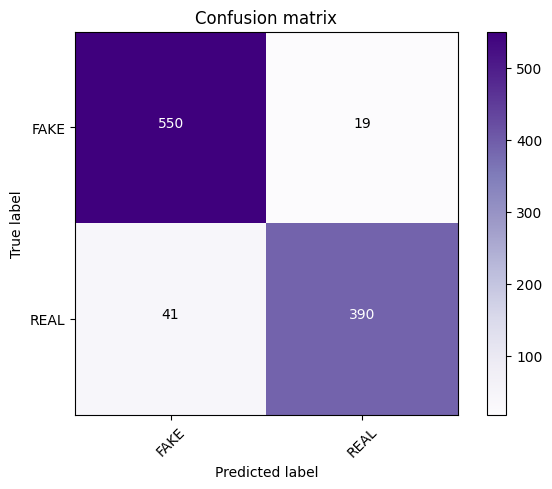

In [ ]:
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### CLASSIFICATION MODEL : MULTINOMIAL NAIVE BAYES

- Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP)

- Multinomial Naïve Bayes uses term frequency i.e. the number of times a given term appears in a document. Term frequency is often normalized by dividing the raw term frequency by the document length

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

accuracy:   0.591
Confusion matrix, without normalization


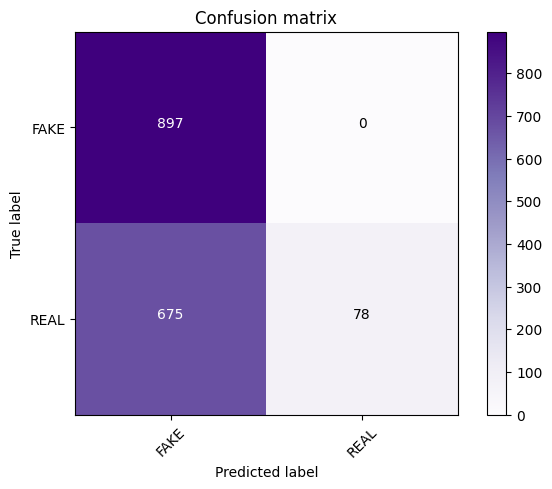

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X1_train, Y1_train)
prediction1 = classifier.predict(X1_test)
score = metrics.accuracy_score(Y1_test, prediction1)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y1_test, prediction1)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

### CLASSIFICATION MODEL : PASSIVE AGGRESSIVE CLASSIFIER

Passive Aggressive Classifier works by responding as passive for correct classifications and responding as aggressive for any miscalculation.

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

accuracy:   0.932
Confusion matrix, without normalization


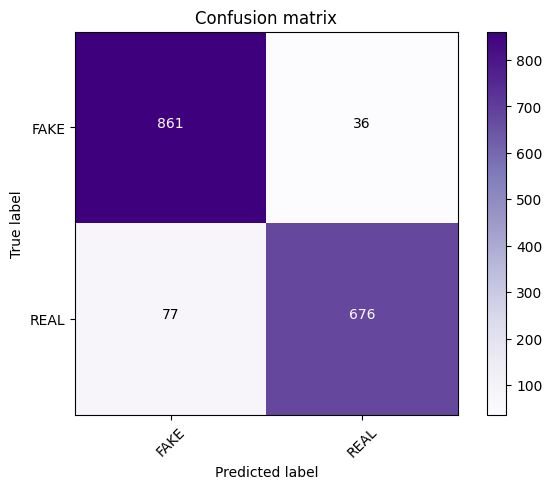

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X2_train, Y2_train)
prediction2 = linear_clf.predict(X2_test)
score = metrics.accuracy_score(Y2_test, prediction2)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y2_test, prediction2)
plot_confusion_matrix(cm2, classes=['FAKE', 'REAL'])

**CLASSIFICATION REPORT:**

- A Classification report is used to measure the quality of predictions from a classification algorithm.

- It is used to show the precision, recall, F1 Score, and support of your trained classification model.



In [ ]:
#Classification report for logistic regression model:
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       569
           1       0.95      0.90      0.93       431

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [ ]:
#Classification report for MultinomialNB model:
print(classification_report(Y1_test,prediction1))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       897
           1       1.00      0.10      0.19       753

    accuracy                           0.59      1650
   macro avg       0.79      0.55      0.46      1650
weighted avg       0.77      0.59      0.48      1650



In [ ]:
#Classification report for PASSIVE AGGRESSIVE CLASSIFIER:
print(classification_report(Y2_test,prediction2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       897
           1       0.95      0.90      0.92       753

    accuracy                           0.93      1650
   macro avg       0.93      0.93      0.93      1650
weighted avg       0.93      0.93      0.93      1650



MODEL COMPARISON

Hence, in this dataset we can observe that

Logistic Regression : Accuracy is 0.94

Multinomial Naive Bayes : Accuracy is 0.59

Passive Aggressive Classifier : Accuracy is 0.93